**1. $a_2-a_1=\log2$, $a_3-a_1=\log3$일 때, $(a_1,a_2,a_3)$의 소프트맥스(softmax)값을 구하시오.**

$(a_1, a_2, a_3)$의 소프트맥스값과 $(a_1+C, a_2+C, a_3+C)$의 소프트맥스값은 동일합니다.  
$C=-a_1$으로 잡으면 $(0, \log_2, \log_3)$의 소프트 맥스 값을 구하면 됩니다.  
먼저 $e^x$을 취하면 $(1,2,3)$이 되고 노멀라이즈하면
$$
({1 \over 6}, {1 \over 3}, {1 \over 2})
$$
가 됩니다.

**2. 활성화 함수가 sigmoid인 이층 신경망이 dictionary
$$
\{W_1 : \begin{bmatrix} 1&2&3 \\ -4&-5&-6 \end{bmatrix},~
b_1 : [0,0,0],~
W_2 : \begin{bmatrix} 5&0 \\ 0&-3 \\ 4&0 \end{bmatrix},~
b_2 : [0,0]
\}
$$
로 주어져 있다.**

**(i) $[\log 4,\log 2]$를 입력했을때 출력되는 소프트맥스(softmax)값을 구하시오.**

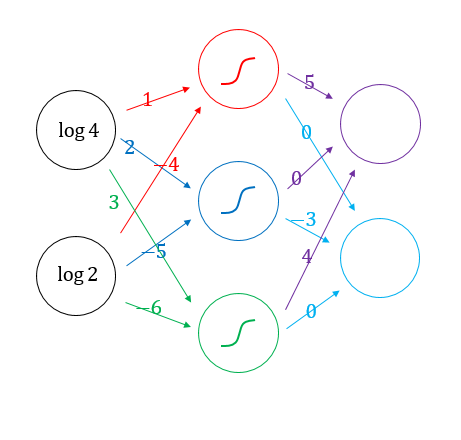
첫번째 Affine층을 통과시키면
$$
\begin{pmatrix}
\log 4 & \log 2
\end{pmatrix}
\begin{pmatrix}
1&2&3\\
-4&-5&-6
\end{pmatrix}
+
\begin{pmatrix}
0&0&0
\end{pmatrix}
=
\begin{pmatrix}
-2\log2&-\log2&0
\end{pmatrix}
$$
입니다.  
은닉층에서 시그모이드 함수
$$
y={1 \over 1+e^{-x}}
$$
를 좌표별로 적용하면
$$
({1 \over 1+e^{2\log2}}, {1 \over 1+e^{\log2}}, {1 \over 1+e^0})
= ({1 \over 1+4}, {1 \over 1+2}, {1 \over 1+1})
= ({1 \over 5}, {1 \over 3}, {1 \over 2})
$$
이 나옵니다.  
두번째 Affine층을 통과시키면
$$
\begin{pmatrix}
{1 \over 5} & {1 \over 3} & {1 \over 2}
\end{pmatrix}
\begin{pmatrix}
5&0 \\ 0&-3 \\ 4&0
\end{pmatrix}
+
\begin{pmatrix}
0&0
\end{pmatrix}
=
\begin{pmatrix}
3&-1
\end{pmatrix}
$$
입니다.  
마지막으로 소프트맥스 변환을 합니다.  
먼저 $e^x$을 적용하면
$$
(e^3, e^{-1})
$$
이고 노멀라이즈하면
$$
({e^3 \over e^3+e^{-1}},{e^{-1} \over e^3+e^{-1}}) = ({e^4 \over e^4+1},{1 \over e^4+1})
$$
을 얻습니다.

**(ii) forward.py를 수정하여 검산하시오.**

In [1]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def init_network():
    network = {}
    network['W1'] = np.array([[1,2,3],[-4,-5,-6]])
    network['b1'] = np.array([0,0,0])
    network['W2'] = np.array([[5,0],[0,-3],[4,0]])
    network['b2'] = np.array([0,0])
        
    return network

def forward(network, x):
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    y = softmax(a2)
    
    return y

network = init_network()
x = np.array([np.log(4),np.log(2)])
y = forward(network, x)
print(y)

[0.98201379 0.01798621]


위에서 손으로 계산한 값과 비교해보니 일치하네요.

In [2]:
print([np.exp(4)/(np.exp(4)+1),1/(np.exp(4)+1)])

[0.9820137900379085, 0.01798620996209156]


**3. 활성화 함수가 ReLU인 이층 신경망이 dictionary
$$
\{W_1 : \begin{bmatrix} 0&0&0&0&1 \\ -1&0&0&0&0 \\ 0&-1&0&0&0 \\ 0&0&-1&0&0 \\ 0&0&0&-1&0 \end{bmatrix},~
b_1 : [5,4,3,2,1],~
W_2 : \begin{bmatrix} 0&1&0&0&0 \\ 0&0&1&0&0 \\ 0&0&0&1&0 \\ 0&0&0&0&1 \\ 1&0&0&0&0 \end{bmatrix},~
b_2 : [-1,-2,0,0,0]
\}
$$
로 주어져 있다.**

**(i) [1,2,3,4,5]를 입력했을때 출력되는 소프트맥스(softmax)값을 구하시오.**

첫번째 Affine층을 통과시키면
$$
\begin{aligned}
&
\begin{pmatrix}
1&2&3&4&5
\end{pmatrix}
\begin{pmatrix} 0&0&0&0&1 \\ -1&0&0&0&0 \\ 0&-1&0&0&0 \\ 0&0&-1&0&0 \\ 0&0&0&-1&0 \end{pmatrix}
+
\begin{pmatrix}
5&4&3&2&1
\end{pmatrix}\\
=&
\begin{pmatrix}
-2&-3&-4&-5&1
\end{pmatrix}
+
\begin{pmatrix}
5&4&3&2&1
\end{pmatrix}\\
=&
\begin{pmatrix}
3&1&-1&-3&2
\end{pmatrix}
\end{aligned}
$$
입니다.  
은닉층에서 ReLU 함수를 좌표별로 적용하면 음수가 죽게 되어
$$
(3,1,0,0,2)
$$
가 나옵니다.  
두번째 Affine층을 통과시키면
$$
\begin{aligned}
&
\begin{pmatrix}
3&1&0&0&2
\end{pmatrix}
\begin{pmatrix} 0&1&0&0&0 \\ 0&0&1&0&0 \\ 0&0&0&1&0 \\ 0&0&0&0&1 \\ 1&0&0&0&0 \end{pmatrix}
+
\begin{pmatrix}
-1&-2&0&0&0
\end{pmatrix}\\
=&
\begin{pmatrix}
2&3&1&0&0
\end{pmatrix}
+
\begin{pmatrix}
-1&-2&0&0&0
\end{pmatrix}\\
=&
\begin{pmatrix}
1&1&1&0&0
\end{pmatrix}
\end{aligned}
$$
입니다.  
마지막으로 소프트맥스 변환을 합니다.  
먼저 $e^x$을 적용하면
$$
(e,e,e,1,1)
$$
이고 노멀라이즈하면
$$
({e \over 3e+2},{e \over 3e+2}, {e \over 3e+2},{1 \over 3e+2},{1 \over 3e+2})
$$
를 얻습니다.

**(ii) forward.py를 수정하여 검산하시오.**

In [3]:
def relu(x):
    return np.maximum(0, x)

def init_network():
    network = {}
    network['W1'] = np.array([[0,0,0,0,1],[-1,0,0,0,0],[0,-1,0,0,0],[0,0,-1,0,0],[0,0,0,-1,0]])
    network['b1'] = np.array([5,4,3,2,1])
    network['W2'] = np.array([[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1],[1,0,0,0,0]])
    network['b2'] = np.array([-1,-2,0,0,0])
        
    return network

def forward(network, x):
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    a1 = np.dot(x,W1)+b1
    z1 = relu(a1)
    a2 = np.dot(z1,W2)+b2
    y = softmax(a2)
    
    return y

network = init_network()
x = np.array([1,2,3,4,5])
y = forward(network, x)
print(y)

[0.26768323 0.26768323 0.26768323 0.09847516 0.09847516]


위에서 손으로 계산한 값과 비교해보니 일치하네요.

In [4]:
print([np.e/(3*np.e+2),np.e/(3*np.e+2),np.e/(3*np.e+2),1/(3*np.e+2),1/(3*np.e+2)])

[0.2676832288953427, 0.2676832288953427, 0.2676832288953427, 0.09847515665698596, 0.09847515665698596]


**4. 일반적으로 인공신경망은 학습 시작전 가중치 행렬은 정규분포를 따라 랜덤하게 생성하고 편향은 제로 벡터로 둔다.**

**(i) 인터넷 검색을 통해 표준정규분포를 따라 랜덤하게 선택된 숫자로 벡터와 행렬을 생성해내는 numpy 함수를 찾아보시오.**

`np.random.randn`

**(ii) 인터넷 검색을 통해 제로 벡터를 만드는 numpy 함수를 찾아보시오.**

`np.zeros`

**(iii) forward.py를 수정하여 다음 신경망을 구현하시오.**

**- 3층 신경망**

**- 각 층의 뉴런의 개수는 784,50,100,10**

**- 활성화 함수는 sigmoid**

**- 가중치 행렬은 표준정규분포를 따라 랜덤하게 생성, 편향 벡터는 제로 백터**
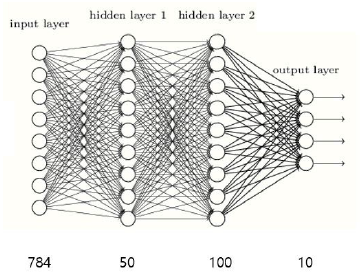

In [5]:
def init_network():
    network = {}
    network['W1'] = np.random.randn(784,50)
    network['b1'] = np.zeros(50)
    network['W2'] = np.random.randn(50,100)
    network['b2'] = np.zeros(100)
    network['W3'] = np.random.randn(100,10)
    network['b3'] = np.zeros(10)
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    y = softmax(a3)
    
    return y

network = init_network()

**(iv) 인터넷 검색을 통해 균등분포를 따라 0과 1사이의 숫자를 랜덤하게 뽑아내 벡터를 생성해내는 numpy 함수를 찾아보시오.**

`np.random.rand`

**(v) 균등분포를 따라 0과 1사이의 숫자를 뽑아내 784차원의 벡터를 생성한 후 인공신경망에 입력해서 나온 값을 출력하시오.**

In [6]:
x = np.random.rand(784)
y = forward(network, x)
print(y)

[1.84345170e-05 9.96067090e-01 3.70776696e-04 3.41147703e-06
 1.93267406e-05 2.26788626e-07 9.68013701e-06 3.63384862e-07
 3.50463710e-03 6.05285512e-06]
